In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
Airfares=pd.read_csv("Airfares.csv")
Airfares.head()

,COUPON,NEW,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,1,5291.99,28637,21112,3036732,205711,312,7864,64.11
1,1.06,3,0,5419.16,26993,29838,3532657,7145897,576,8820,174.47
2,1.06,3,0,9185.28,30124,29838,5787293,7145897,364,6452,207.76
3,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
4,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47


In [3]:
print(Airfares.columns.values)

['COUPON' 'NEW' 'SW' 'HI' 'S_INCOME' 'E_INCOME' 'S_POP' 'E_POP' 'DISTANCE'
 'PAX' 'FARE']


In [8]:
select_index= ['COUPON' ,'NEW', 'SW' ,'HI', 'S_INCOME', 'E_INCOME' ,'S_POP' ,'E_POP' ,'DISTANCE','PAX']
Airfares_x = Airfares.loc[:,select_index] #2D PREDICTORS ARRAY

In [9]:
Airfares_y=Airfares.loc[:,'FARE'] 

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid =\
train_test_split(Airfares_x,Airfares_y, test_size=0.3,random_state=22)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
np.set_printoptions(precision=4, suppress=True) 
print('%.4f' %model.intercept_) 

-113.5858


In [13]:
print(model.coef_) 

[  9.3088  -0.6511 -42.9638   0.0085   0.0026   0.0023   0.       0.
   0.0663  -0.0012]


In [14]:
y_predict = model.predict(x_valid)

In [15]:
#COUPON=, NEW=3, SW= 0, HI = 4442.141, S_INCOME = 28,760, E_INCOME = 27,664, S_POP = 4,557,004, E_POP = 3,195,503, PAX = 12782, DISTANCE = 1976.

In [16]:
y_new_predict = model.predict([[1.202,3,0,4442.141,28760,27664,4557004,3195503,1976,12782]])

In [17]:
y_new_predict

array([241.973])

In [49]:
e =np.mean(y_valid)- y_new_predict

In [50]:
e

array([-84.4026])

In [51]:
84.4026/np.mean(y_valid)

0.535650040061454

In [48]:
np.mean(y_predict)

155.2051057118542

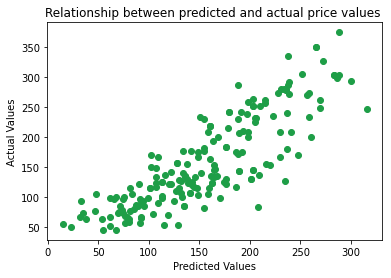

In [30]:
plt.scatter(y_predict, y_valid,color='#1E9E47')
plt.title("Relationship between predicted and actual price values ")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [31]:
e = y_valid - y_predict

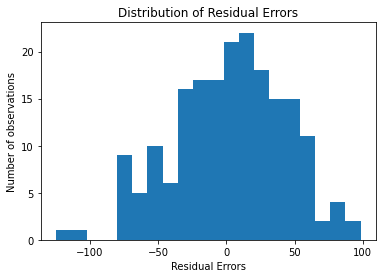

In [37]:

plt.hist(e, 20)

plt.title('Distribution of Residual Errors')
plt.xlabel("Residual Errors")
plt.ylabel("Number of observations")

plt.show()